# Fruit 10.v2
Fruit 10, but better.

### Import libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv

### Load dataset from local

In [3]:
data = tf.keras.utils.image_dataset_from_directory(
    'res/datasets/fruits360/',
    labels='inferred',
    label_mode='categorical',
    class_names=['Apple Red 1', 'Banana', 'Cauliflower', 'Corn',
                 'Cucumber Ripe', 'Ginger Root', 'Onion Red Peeled',
                 'Pepper Red', 'Pineapple', 'Raspberry'],
    color_mode='rgb',
    batch_size=32,
    image_size=(100, 100),
    shuffle=True,
    seed=np.random.randint(1000),
    validation_split=None,  # Corrected parameter name
    subset=None,     # Use "training" for the training set
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1000 files belonging to 10 classes.


### Preprocessing

In [4]:
# x = images y = labels --> normalizing the images to be 0 to 1
scaled_data = data.map(lambda x,y: (x / 255, y))

In [5]:
scaled_iterator = scaled_data.as_numpy_iterator()

In [6]:
batch = scaled_iterator.next()

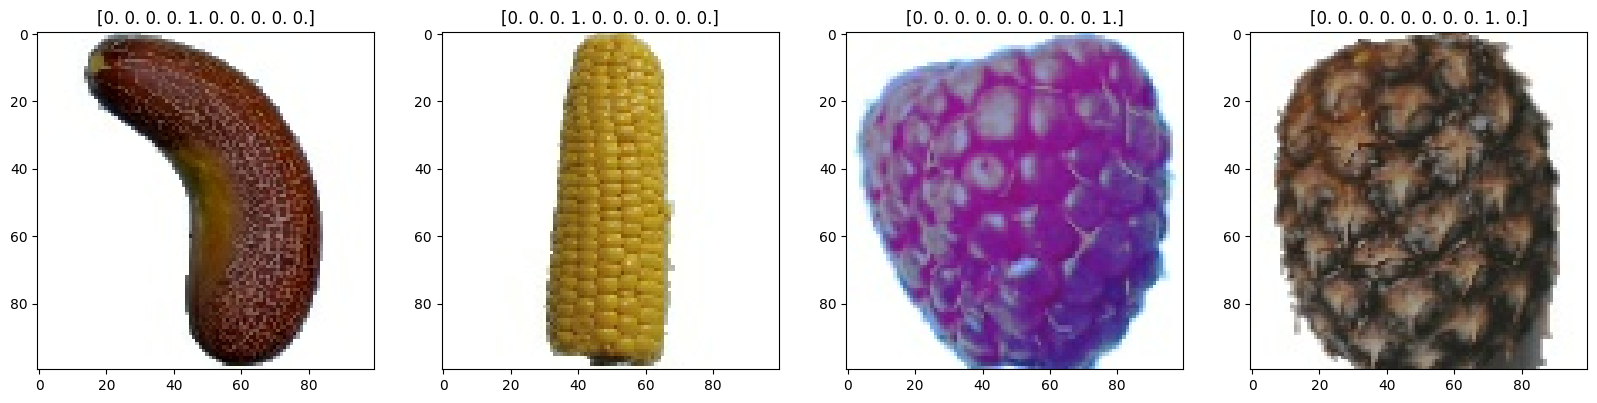

In [7]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(str(batch[1][idx]))

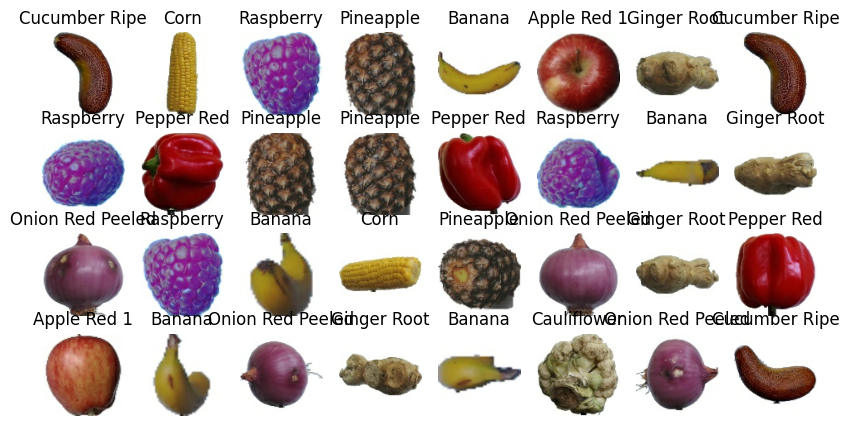

In [8]:
# Assuming batch[0] contains the images and batch[1] contains the labels
images, labels = batch

# Get the class names for labeling the plots
class_names = ['Apple Red 1', 'Banana', 'Cauliflower', 'Corn',
               'Cucumber Ripe', 'Ginger Root', 'Onion Red Peeled',
               'Pepper Red', 'Pineapple', 'Raspberry']

# Convert one-hot encoded labels to integers
labels = np.argmax(labels, axis=1)

# Plot every image in the batch
num_images = len(images)
plt.figure(figsize=(10, 5))

for i in range(num_images):
    plt.subplot(4, 8, i + 1)  # Adjust the subplot grid as needed
    plt.imshow(images[i])
    plt.title(class_names[labels[i]])
    plt.axis('off')

plt.show()

### Splitting the data

In [9]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [10]:
#take = how many batch to train, skip = skip the batches
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### Training Model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [12]:
model= Sequential()
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=10, activation='softmax'))

In [13]:
#Define the compile operation with your optimizer and learning rate of choice
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 32)        0

In [15]:
logdir = 'logs'

In [16]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [17]:
# Fit the model to the training data
hist = model.fit(train, epochs=4, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/4
22/22 [==============================] - 5s 205ms/step - loss: 9.7468 - accuracy: 0.2940 - val_loss: 1.1272 - val_accuracy: 0.5833
Epoch 2/4
22/22 [==============================] - 4s 203ms/step - loss: 0.8447 - accuracy: 0.7102 - val_loss: 0.4563 - val_accuracy: 0.8490
Epoch 3/4
22/22 [==============================] - 5s 212ms/step - loss: 0.5449 - accuracy: 0.8352 - val_loss: 0.2092 - val_accuracy: 0.9583
Epoch 4/4
22/22 [==============================] - 5s 208ms/step - loss: 0.3674 - accuracy: 0.8977 - val_loss: 0.1389 - val_accuracy: 0.9427


In [18]:
# model.save('./models/fruit_10_v2_model.h5')

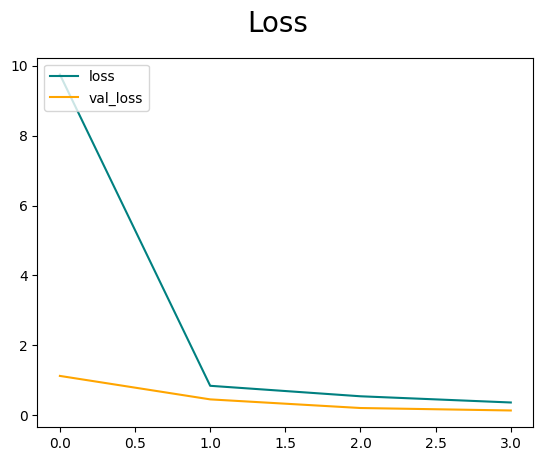

In [19]:
# Plot loss
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

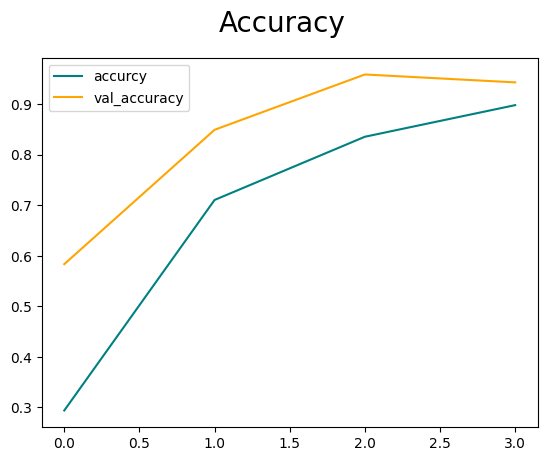

In [20]:
# Plot accuracy
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accurcy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## Evaluate performance

1/1 [==============================] - 0s 38ms/step


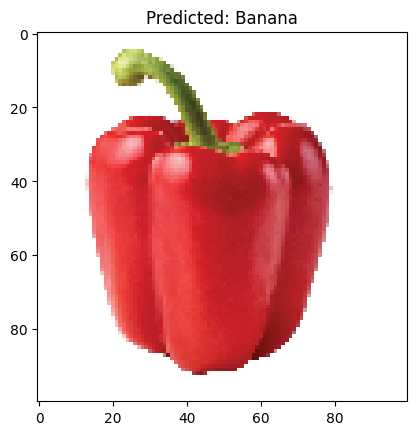

In [21]:

# Path to your single image
single_image_path = 'res/redpepper.jpeg'

class_names = ['Aple Red 1', 'Banana', 'Cauliflower', 'Corn',
                 'Cucumber Ripe', 'Ginger Root', 'Onion Red Peeled',
                 'Pepper Red', 'Pineapple', 'Raspberry']

# Preprocess the single image
single_image = cv.imread(single_image_path)
single_image = cv.cvtColor(single_image, cv.COLOR_BGR2RGB)
single_image = tf.image.resize(single_image,(100,100))
single_image = single_image / 255.0  # Normalize the image to be in the range [0, 1]


# Make predictions on the single image
single_image_prediction = model.predict(np.expand_dims(single_image, axis=0))
single_image_prediction_class = np.argmax(single_image_prediction)


# Display the single image with the predicted label
plt.imshow(single_image)
plt.title(f"Predicted: {class_names[single_image_prediction_class]}")
plt.show()

1/1 [==============================] - 0s 11ms/step


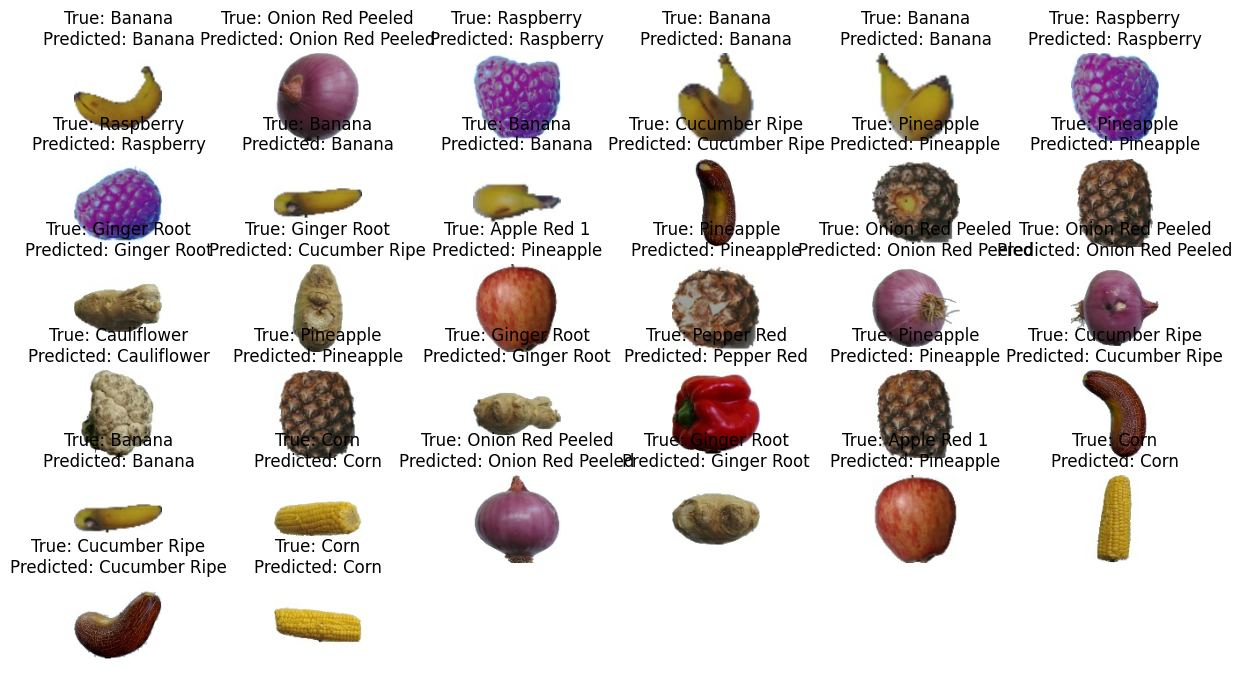

In [22]:
import os
import random
import math  # Import math module for calculations

def testing_images(test_data):
    
    num_images = len(test_data)
    
    # Assuming 'test_data' is your test dataset
    test_iterator = test_data.as_numpy_iterator()

    # Get the first batch from the iterator
    batch = next(test_iterator, None)
    
    # Get the class names for labeling the plots
    class_names = ['Apple Red 1', 'Banana', 'Cauliflower', 'Corn',
                'Cucumber Ripe', 'Ginger Root', 'Onion Red Peeled',
                'Pepper Red', 'Pineapple', 'Raspberry']

    
    if batch:
        # Unpack the batch
        images, labels = batch
        
        # Convert one-hot encoded labels to integers
        labels = np.argmax(labels, axis=1)


        # Get the number of images in the batch
        num_images = len(images)

        # Calculate the number of rows and columns for the subplot grid
        grid_size = math.ceil(math.sqrt(num_images))
        
        # Create subplots for each class in a single row
        plt.figure(figsize=(15, 8))

        for i in range(num_images):
            plt.subplot(grid_size, grid_size, i + 1)  # Adjust the subplot grid as needed
            # Make predictions on the single image
            single_image = np.expand_dims(images[i], axis=0)
            single_image_prediction = model.predict(single_image)
            single_image_prediction_class = np.argmax(single_image_prediction)

            # Normalize the image to be in the range [0, 1]
            normalized_image = images[i] / 255.0

            # Display the single image with the predicted label
            plt.imshow(normalized_image)
            true_label = class_names[labels[i]] if class_names else f"Class {labels[i]}"
            predicted_label = class_names[single_image_prediction_class] if class_names else f"Class {single_image_prediction_class}"
            plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
            plt.axis('off')

        # Show the plot
        plt.show()


testing_images(test)